In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Pets.csv")
breed = pd.read_csv("breed_labels.csv")
color = pd.read_csv("color_labels.csv")
state = pd.read_csv("state_labels.csv")

In [3]:
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
print(breed.head())
print(" ")
print(color.head())
print("")
print(state.head())

   BreedID  Type         BreedName
0        1     1     Affenpinscher
1        2     1      Afghan Hound
2        3     1  Airedale Terrier
3        4     1            Akbash
4        5     1             Akita
 
   ColorID ColorName
0        1     Black
1        2     Brown
2        3    Golden
3        4    Yellow
4        5     Cream

   StateID     StateName
0    41336         Johor
1    41325         Kedah
2    41367      Kelantan
3    41401  Kuala Lumpur
4    41415        Labuan


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [6]:
data["Type"] = data["Type"].astype('category')
data["Gender"] = data["Gender"].astype('category')
data["Breed1"] = data["Breed1"].astype('category')
data["Breed2"] = data["Breed2"].astype('category')
data["Color1"] = data["Color1"].astype('category')
data["Color2"] = data["Color2"].astype('category')
data["Color3"] = data["Color3"].astype('category')
data["MaturitySize"] = data["MaturitySize"].astype('category')
data["FurLength"] = data["FurLength"].astype('category')
data["Vaccinated"] = data["Vaccinated"].astype('category')
data["Dewormed"] = data["Dewormed"].astype('category')
data["Sterilized"] = data["Sterilized"].astype('category')
data["Health"] = data["Health"].astype('category')
data["Dewormed"] = data["Dewormed"].astype('category')
data["State"] = data["State"].astype('category')
data["AdoptionSpeed"] = data["AdoptionSpeed"].astype('category')

In [7]:
#new = data.merge(breed, how = 'left', left_on='Breed1', right_on='BreedID')

In [8]:
#drop columns
#data.drop(['RescuerID','Name','PetID','Description'],axis=1,inplace=True)
#print(data.head())

In [9]:
data.describe()
#no missing values

,Age,Quantity,Fee,VideoAmt,PhotoAmt
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.576069,21.259988,0.056760,3.889215
std,18.155790,1.472477,78.414548,0.346185,3.487810
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,2.000000
50%,3.000000,1.000000,0.000000,0.000000,3.000000
75%,12.000000,1.000000,0.000000,0.000000,5.000000
max,255.000000,20.000000,3000.000000,8.000000,30.000000


In [10]:
data.isnull().sum()
#no missing values in any column

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

# Exploring Dataset

In [11]:
EDAdata = data.copy()
cleanup = {'Type':{1:'Dog', 2:'Cat'},
           'Gender' : {1 : 'Male', 2 : "Female", 3 : "Mixed"},
           'FurLength': {1 : 'Short', 2 : 'Medium', 3 : 'Long', 0 : 'Not Specified'},
           'Vaccinated': {1 : 'Yes', 2 : 'No', 3 : 'Not Sure'},
           'Dewormed':  {1 : 'Yes', 2 : 'No', 3 : 'Not Sure'},
           'Sterilized':{1 : 'Yes', 2 : 'No', 3 : 'Not Sure'},
           'Health': {1 : 'Healthy', 2 : 'Minor Injury', 3 : 'Serious Injury', 0 : 'Not Specified'},
           'MaturitySize':{1 : 'Small', 2 : 'Medium', 3 : 'Large', 4 : 'Extra Large', 0 : 'Not Specified'}}
    
EDAdata.replace(cleanup, inplace=True)
EDAdata.head()

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,Cat,Nibble,3,299,0,Male,1,7,0,Small,...,Healthy,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,Cat,No Name Yet,1,265,0,Male,1,2,0,Medium,...,Healthy,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,Dog,Brisco,1,307,0,Male,2,7,0,Medium,...,Healthy,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,Dog,Miko,4,307,0,Female,1,2,0,Medium,...,Healthy,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,Dog,Hunter,1,307,0,Male,1,0,0,Medium,...,Healthy,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [12]:
"There are in total " + str(EDAdata['PetID'].count()) + ' pets in total for adoption'

'There are in total 14993 pets in total for adoption'

In [13]:
"Out of which " + str(EDAdata['PetID'][EDAdata['Type'] == 'Cat'].count()) + " are Cats and " +str(EDAdata['PetID'][EDAdata['Type'] == 'Dog'].count()) + " are Dogs"

'Out of which 6861 are Cats and 8132 are Dogs'

In [14]:
EDAdata['Type'][EDAdata['Age'].max()] + ' is the oldest pet which is ' + str(EDAdata['Age'].max()) + ' months old'

'Cat is the oldest pet which is 255 months old'

In [15]:
print(str(round(EDAdata['PetID'][EDAdata['AdoptionSpeed']==0].count()/EDAdata['PetID'].count(),5)*100) + "% were adopted on the same day")
print(str(round(EDAdata['PetID'][EDAdata['AdoptionSpeed']==1].count()/EDAdata['PetID'].count(),5)*100) + "% were adopted between 1 and 7 days after being listed")
print(str(round(EDAdata['PetID'][EDAdata['AdoptionSpeed']==2].count()/EDAdata['PetID'].count(),5)*100) + "% were adopted between 8 and 30 days after being listed")
print(str(round(EDAdata['PetID'][EDAdata['AdoptionSpeed']==3].count()/EDAdata['PetID'].count(),5)*100) + "% were adopted between 31 and 90 days after being listed")
print(str(round(EDAdata['PetID'][EDAdata['AdoptionSpeed']==4].count()/EDAdata['PetID'].count(),5)*100) + "% were not adopted after 100 days of being listed")


2.735% were adopted on the same day
20.61% were adopted between 1 and 7 days after being listed
26.926% were adopted between 8 and 30 days after being listed
21.737000000000002% were adopted between 31 and 90 days after being listed
27.993000000000002% were not adopted after 100 days of being listed


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

a=sns.countplot(x='AdoptionSpeed',data=EDAdata, palette = 'Blues_d') #Lower is faster
#plt.legend(title='Adoption Speed', loc='upper left', labels=['0 being the fastest'])
a.text(5 ,8, s="0 being the fastest",fontsize=14, verticalalignment='top')
plt.show(a)

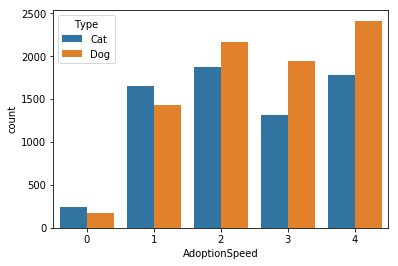

In [17]:
sns.countplot(x='AdoptionSpeed', data=EDAdata, hue='Type')

Cats are more likly to be adopted faster than dogs

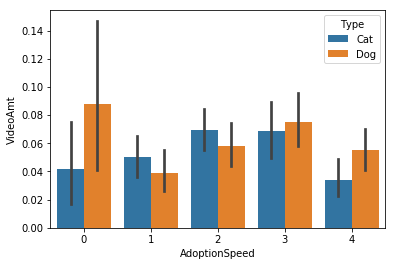

In [18]:
sns.barplot(x='AdoptionSpeed', y='VideoAmt', data=EDAdata, hue='Type')

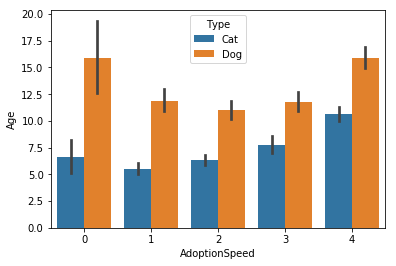

In [19]:
sns.barplot(x='AdoptionSpeed', y='Age', data=EDAdata, hue='Type')

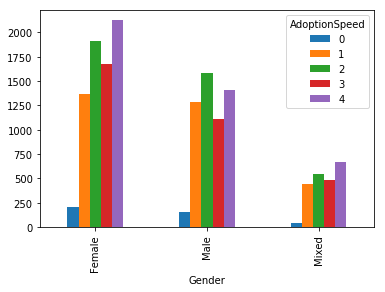

In [20]:
pd.crosstab(EDAdata.Gender,EDAdata.AdoptionSpeed).plot(kind='bar')
# 1 = Male, 2 = Female, 3 = Mixed

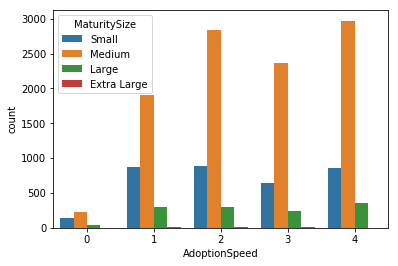

In [21]:
sns.countplot(x='AdoptionSpeed', hue='MaturitySize', data=EDAdata)
#(1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified

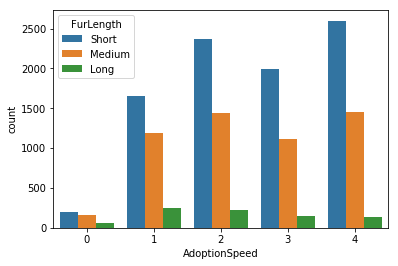

In [22]:
sns.countplot(x='AdoptionSpeed', hue='FurLength', data=EDAdata)

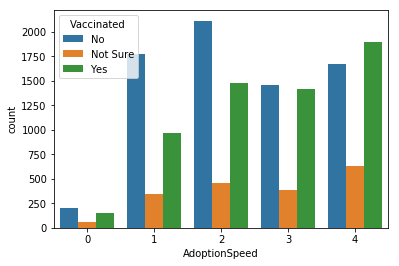

In [23]:
sns.countplot(x='AdoptionSpeed', hue='Vaccinated', data=EDAdata)

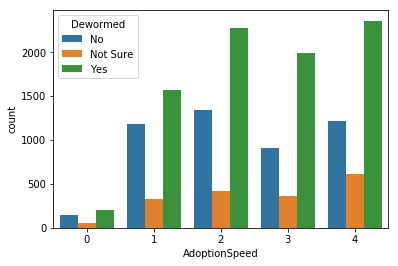

In [24]:
sns.countplot(x='AdoptionSpeed', hue='Dewormed', data=EDAdata)

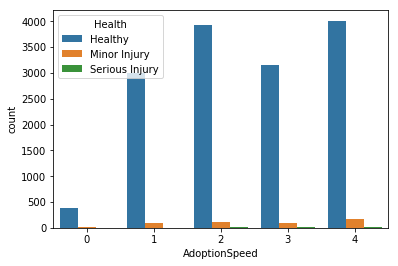

In [25]:
sns.countplot(x='AdoptionSpeed',hue='Health', data = EDAdata)
#1=Healthy, 2 = Minor Injury, 3=Serious Injury

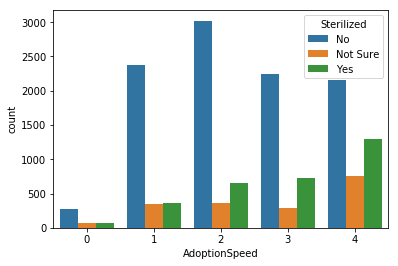

In [26]:
sns.countplot(x='AdoptionSpeed',hue='Sterilized', data = EDAdata)

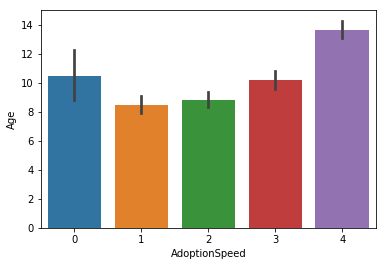

In [27]:
sns.barplot(x='AdoptionSpeed',y='Age', data = EDAdata)

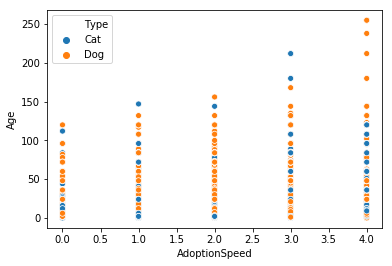

In [36]:
sns.scatterplot(x='AdoptionSpeed',y='Age', data = EDAdata, hue='Type')

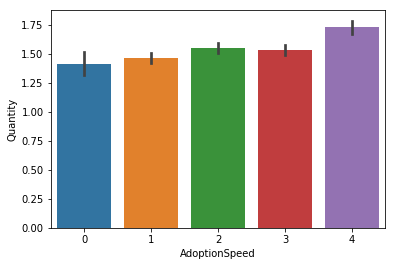

In [30]:
sns.barplot(x='AdoptionSpeed',y='Quantity', data = EDAdata)

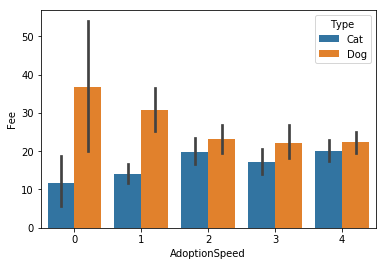

In [31]:
sns.barplot(x='AdoptionSpeed',y='Fee', hue = 'Type', data = EDAdata)

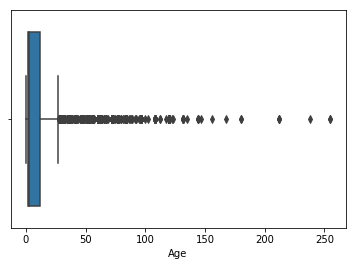

In [37]:
import seaborn as sns
sns.boxplot(EDAdata['Age'])

In [40]:
df = data.drop(['Name', 'PetID', 'RescuerID', 'Description'], axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 20 columns):
Type             14993 non-null category
Age              14993 non-null int64
Breed1           14993 non-null category
Breed2           14993 non-null category
Gender           14993 non-null category
Color1           14993 non-null category
Color2           14993 non-null category
Color3           14993 non-null category
MaturitySize     14993 non-null category
FurLength        14993 non-null category
Vaccinated       14993 non-null category
Dewormed         14993 non-null category
Sterilized       14993 non-null category
Health           14993 non-null category
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null category
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null float64
AdoptionSpeed    14993 non-null category
dtypes: category(15), float64(1), int64(4)
memory usage: 849.8 KB


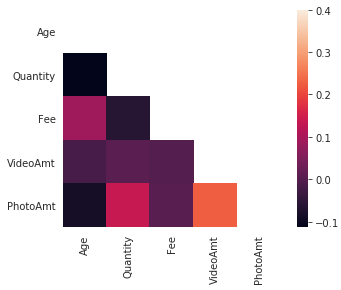

In [41]:
corr = df.corr()
#sns.heatmap(corr, cmap="coolwarm")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"): 
    ax = sns.heatmap(corr, mask=mask, vmax=0.4, square=True)